# [word2vec](https://wikidocs.net/22660)
- 대표적인 워드 임베딩 기법
- **원핫 인코딩 결과 벡터의 문제점**: 입력 길이에 따라 벡터의 크기가 늘어나는 문제 + 유사도를 계산할 수 없는 문제
- 따라서, 원핫 벡터를 워드 임베딩을 통해 임베딩 벡터로 만들어 문제 해결
<br/>

- 목적: 밀집 벡터로 변환함으로써 유사도 계산 or 연산 수행, 다른 작업에서 사용할 수 있는 전이학습 지원

- CBOW와 Skip-gram 두 가지 종류

<br/><br/>

## CBOW(Continuous Bag of Words)
- 주변에 있는 단어들(Context word)을 입력으로 중간에 있는 단어(center word)를 예측하는 방법

- 윈도우(window): 중심 단어를 예측하기 위해 주변 몇 개의 단어들을 사용할지에 대한 범위
- ex) 윈도우 크기: 2, 중심 단어: sat이면 앞의 fat과 cat, 뒤의 on, the를 입력으로 사용 <br/>

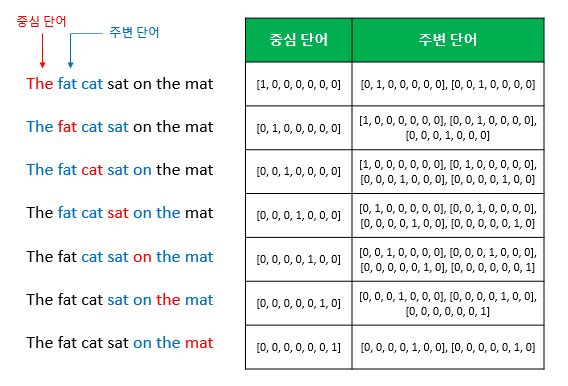<br/>
- 슬라이딩 윈도우:  윈도우를 옆으로 움직여 주변 단어와 중심 단어를 변경해가며 데이터 셋을 만드는 방법 <br/><br/><br/>

### CBOW의 구조
<br/>

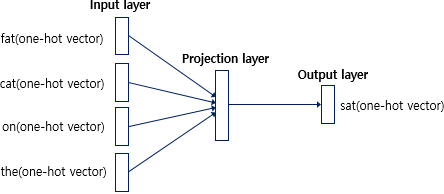<br/>
- 입력: 주변 단어들의 원핫벡터
- projection layer: CBOW의 은닉층, 크기는 M, 일반적인 은닉층과 달리 활성화 함수가 X, 룩업 테이블이라는 연산을 담당하는 층
- 출력: 예측하고자 하는 중간 단어의 원핫벡터

<br/><br/><br/>

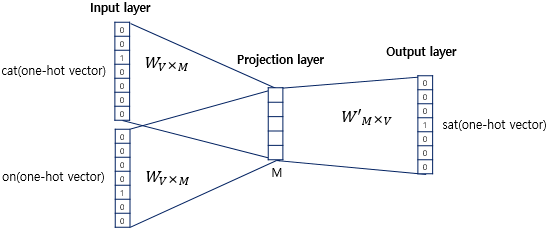<br/>
- V는 단어 집합의 크기
- projection layer의 크기 M은 임베딩하고 난 벡터의 차원이 됨, 여기서는 5
- 입력층과 투사층 사이의 가중치 W는 V × M 행렬, 투사층에서 출력층사이의 가중치 W'는 M × V 행렬 
- **W와 W'는 전치 행렬이 아님** 둘은 랜덤값을 가지는, 행과 열의 크기만 반대인 행렬

<br/> <br/><br/>

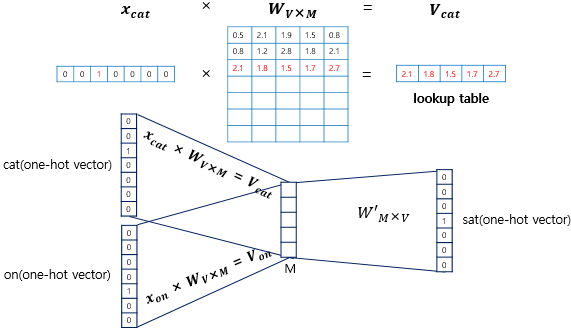<br/>
- 입력 벡터(V)와 가중치 W 행렬의 곱 = W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일 -> 룩업 테이블(lookup table)
- **투사층**: 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 **결과 벡터들의 평균 벡터**를 구함 -> skip-gram과 차이